In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from argparse import Namespace
from collections import Counter
sns.set(style="darkgrid")
import os

In [2]:
args = Namespace(
        loc = '../data',
    )

# Helper functions

In [3]:
def get_label_dict(task:str):
    """Returns the label dict for the task
    Args:
        task: one of 'a' , 'b'
    """
    assert isinstance(task,str)

    task == task.lower()
    if task == 'a':
        task_a_label_dict = {'NAG':0, 'CAG':1, 'OAG':2}
        return task_a_label_dict
    elif task  == 'b':
        task_b_label_dict = {'NGEN':0, 'GEN':1}
        return task_b_label_dict
    else:
        raise ValueError("Must be on of ['a','b'] !")

In [4]:
# folders = ['eng','iben','hin']
# folder_locs = [os.path.join(args.loc,folder) for folder in folders]
# files = [os.listdir(l) for l in folder_locs ]
# [ file for sublist in files for file in sublist if 'csv' in file ]

# English

In [5]:
en_train_set = pd.read_csv(os.path.join(args.loc,'eng','trac2_eng_train.csv'))
en_dev_set = pd.read_csv(os.path.join(args.loc,'eng','trac2_eng_dev.csv'))

In [6]:
print(en_train_set['Sub-task A'].value_counts())
print(en_train_set['Sub-task B'].value_counts())

NAG    3375
CAG     453
OAG     435
Name: Sub-task A, dtype: int64
NGEN    3954
GEN      309
Name: Sub-task B, dtype: int64


In [7]:
print(en_dev_set['Sub-task A'].value_counts())
print(en_dev_set['Sub-task B'].value_counts())

NAG    836
CAG    117
OAG    113
Name: Sub-task A, dtype: int64
NGEN    993
GEN      73
Name: Sub-task B, dtype: int64


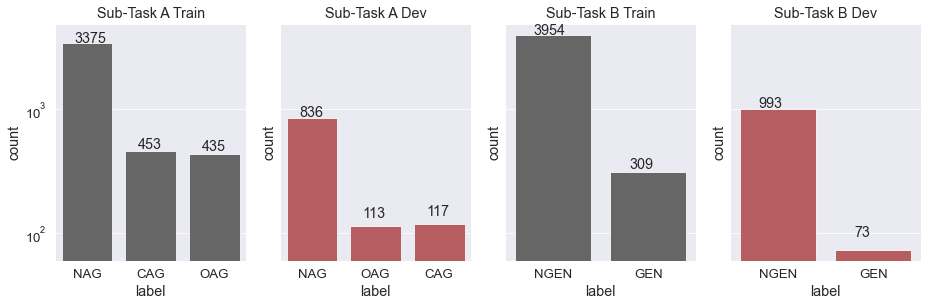

In [8]:
sns.set(style="darkgrid")
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=4,sharey = True, figsize=(13, 4))
    plt.yscale('log')
    # fig2.suptitle(f"Comparative sizes : data_type=train, lang=en")
    axes2 = ax2.flatten()
    fig2.tight_layout()

#     plt.ylim(1, 1e4)
    total_labels = []
    tl = []
    subplot_titles = ['Sub-Task A Train','Sub-Task A Dev','Sub-Task B Train', 'Sub-Task B Dev']

    en_dfs = [
        en_train_set['Sub-task A'],
        en_dev_set['Sub-task A'],
        en_train_set['Sub-task B'],
        en_dev_set['Sub-task B'],
    ]
    for i,df in enumerate(en_dfs):
        lbl_dict = get_label_dict(df.name[-1].lower())

        axp  = sns.countplot(df,ax = axes2[i], color=("0.4" if i%2 ==0 else "r"))
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+20))

In [9]:
en_train_set['Text'].map(lambda x:x.isascii()).value_counts()

True     3431
False     832
Name: Text, dtype: int64

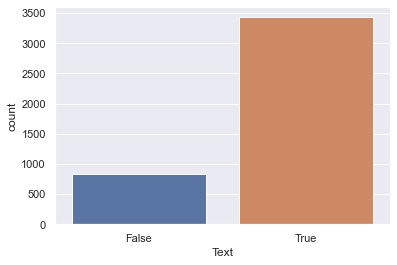

In [10]:
sns.countplot(en_train_set['Text'].map(lambda x:x.isascii()))

In [11]:
en_train_set['Text'].map(lambda x:len(x.strip().split())).describe()

count    4263.000000
mean       17.226836
std        33.475204
min         1.000000
25%         4.000000
50%         8.000000
75%        18.000000
max       806.000000
Name: Text, dtype: float64

# Hindi

In [12]:
hin_train_set = pd.read_csv(os.path.join(args.loc,'hin','trac2_hin_train.csv'))
hin_dev_set = pd.read_csv(os.path.join(args.loc,'hin','trac2_hin_dev.csv'))

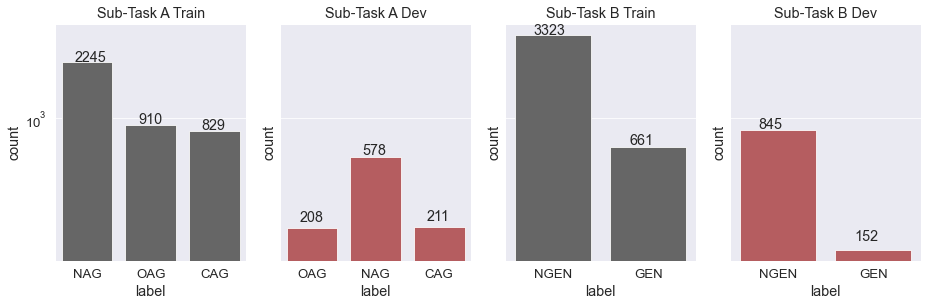

In [13]:
sns.set(style="darkgrid")
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=4,sharey = True, figsize=(13, 4))
    plt.yscale('log')

    axes2 = ax2.flatten()
    fig2.tight_layout()

    total_labels = []
    tl = []
    subplot_titles = ['Sub-Task A Train','Sub-Task A Dev','Sub-Task B Train', 'Sub-Task B Dev']

    hin_dfs = [
        hin_train_set['Sub-task A'],
        hin_dev_set['Sub-task A'],
        hin_train_set['Sub-task B'],
        hin_dev_set['Sub-task B'],
    ]
    for i,df in enumerate(hin_dfs):
        lbl_dict = get_label_dict(df.name[-1].lower())

        axp  = sns.countplot(df,ax = axes2[i], color=("0.4" if i%2 ==0 else "r"))
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+20))

In [14]:
hin_train_set['Text'].map(lambda x:x.isascii()).value_counts()

True     2972
False    1012
Name: Text, dtype: int64

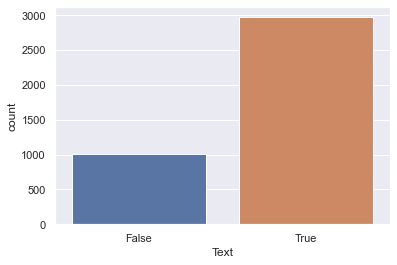

In [15]:
sns.countplot(hin_train_set['Text'].map(lambda x:x.isascii()))

# Bengali

In [16]:
iben_train_set = pd.read_csv(os.path.join(args.loc,'iben','trac2_iben_train.csv'))
iben_dev_set = pd.read_csv(os.path.join(args.loc,'iben','trac2_iben_dev.csv'))

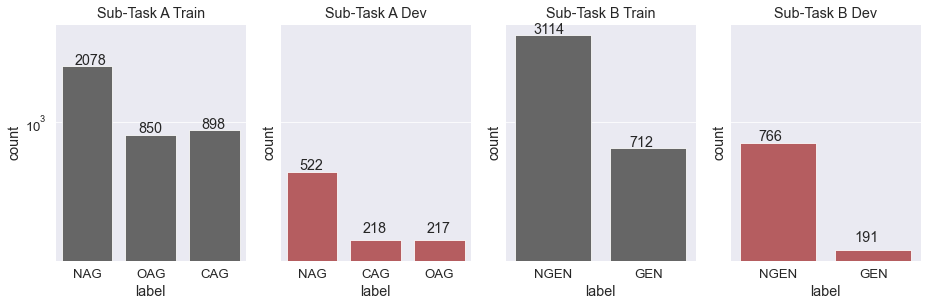

In [17]:
sns.set(style="darkgrid")
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=4,sharey = True, figsize=(13, 4))
    plt.yscale('log')
    # fig2.suptitle(f"Comparative sizes : data_type=train, lang=en")
    axes2 = ax2.flatten()
    fig2.tight_layout()

#     plt.ylim(1, 1e4)
    total_labels = []
    tl = []
    subplot_titles = ['Sub-Task A Train','Sub-Task A Dev','Sub-Task B Train', 'Sub-Task B Dev']

    iben_dfs = [
        iben_train_set['Sub-task A'],
        iben_dev_set['Sub-task A'],
        iben_train_set['Sub-task B'],
        iben_dev_set['Sub-task B'],
    ]
    for i,df in enumerate(iben_dfs):
        lbl_dict = get_label_dict(df.name[-1].lower())

        axp  = sns.countplot(df,ax = axes2[i], color=("0.4" if i%2 ==0 else "r"))
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+20))

In [18]:
#pure english sent vs mixed 
iben_train_set['Text'].map(lambda x:x.isascii()).value_counts()

True     2144
False    1682
Name: Text, dtype: int64

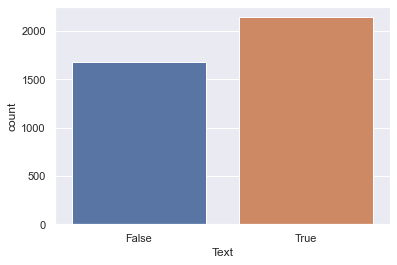

In [19]:
sns.countplot(iben_train_set['Text'].map(lambda x:x.isascii()))

# Test Sets

In [20]:
eng_test_set = pd.read_csv(os.path.join(args.loc,'test','trac2_eng_test.csv'))
hin_test_set = pd.read_csv(os.path.join(args.loc,'test','trac2_hin_test.csv'))
iben_test_set = pd.read_csv(os.path.join(args.loc,'test','trac2_iben_test.csv'))

In [21]:
eng_a_test_set = pd.read_csv(os.path.join(args.loc,'gold','trac2_eng_gold_a.csv'))
hin_a_test_set = pd.read_csv(os.path.join(args.loc,'gold','trac2_hin_gold_a.csv'))
iben_a_test_set = pd.read_csv(os.path.join(args.loc,'gold','trac2_iben_gold_a.csv'))

## Subtask A

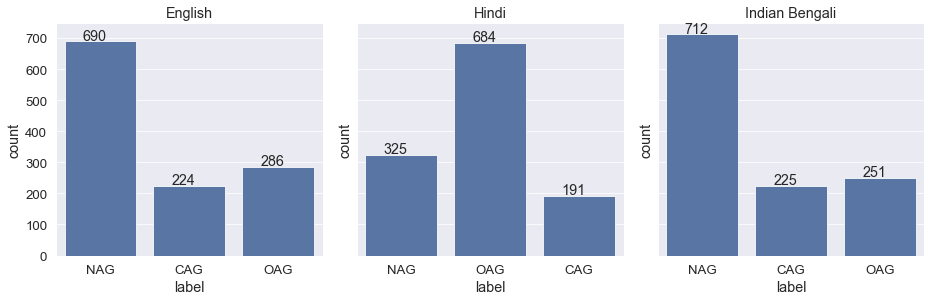

In [22]:
sns.set(style="darkgrid")
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=3,sharey = True, figsize=(13, 4))

    axes2 = ax2.flatten()
    fig2.tight_layout()

    total_labels = []
    tl = []
    subplot_titles = ['English','Hindi','Indian Bengali']

    iben_dfs = [
        eng_a_test_set['Sub-task A'],
        hin_a_test_set['Sub-task A'],
        iben_a_test_set['Sub-task A'],
    ]
    for i,df in enumerate(iben_dfs):
        lbl_dict = get_label_dict(df.name[-1].lower())

        axp  = sns.countplot(df,ax = axes2[i] , color="b")
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+5))

## Subtask B

In [23]:
eng_b_test_set = pd.read_csv(os.path.join(args.loc,'gold','trac2_eng_gold_b.csv'))
hin_b_test_set = pd.read_csv(os.path.join(args.loc,'gold','trac2_hin_gold_b.csv'))
iben_b_test_set = pd.read_csv(os.path.join(args.loc,'gold','trac2_iben_gold_b.csv'))

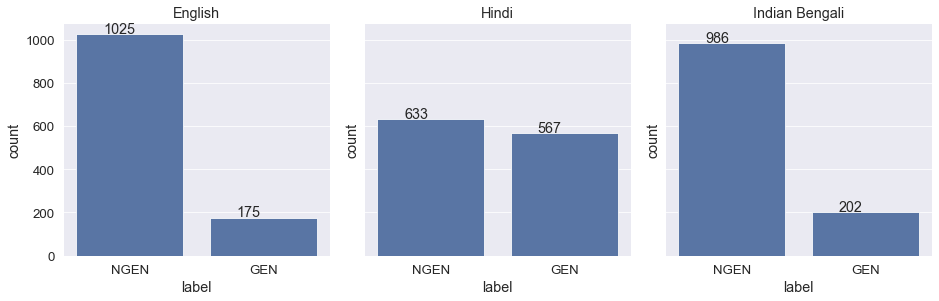

In [24]:
sns.set(style="darkgrid")
with sns.plotting_context('paper',font_scale=1.5):
    fig2, ax2 = plt.subplots(nrows=1, ncols=3,sharey = True, figsize=(13, 4))
    axes2 = ax2.flatten()
    fig2.tight_layout()

    total_labels = []
    tl = []
    subplot_titles = ['English','Hindi','Indian Bengali']

    iben_dfs = [
        eng_b_test_set['Sub-task B'],
        hin_b_test_set['Sub-task B'],
        iben_b_test_set['Sub-task B'],
    ]
    for i,df in enumerate(iben_dfs):
        lbl_dict = get_label_dict(df.name[-1].lower())

        axp  = sns.countplot(df,ax = axes2[i] , color="b")
        axes2[i].set_title(subplot_titles[i])
        axp.set_xlabel('label')
        for p in axp.patches:
                axp.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+5))

# English Dataset Stats


In [25]:
print('Train',en_train_set['Text'].map(lambda x:len(x.strip().split())).describe(),'\n')
print('Dev',en_dev_set['Text'].map(lambda x:len(x.strip().split())).describe(),'\n')
print('Test',eng_test_set['Text'].map(lambda x:len(x.strip().split())).describe(),'\n')

Train count    4263.000000
mean       17.226836
std        33.475204
min         1.000000
25%         4.000000
50%         8.000000
75%        18.000000
max       806.000000
Name: Text, dtype: float64 

Dev count    1066.000000
mean       17.515009
std        30.249980
min         1.000000
25%         4.000000
50%         9.000000
75%        19.000000
max       457.000000
Name: Text, dtype: float64 

Test count    1200.000000
mean       39.681667
std        82.369144
min         1.000000
25%         3.000000
50%        12.500000
75%        45.000000
max      1390.000000
Name: Text, dtype: float64 



# Hindi Dataset Stats


In [26]:
print('Train',hin_train_set['Text'].map(lambda x:len(x.strip().split())).describe(), '\n')
print('Dev',hin_dev_set['Text'].map(lambda x:len(x.strip().split())).describe(), '\n')
print('Test',hin_test_set['Text'].map(lambda x:len(x.strip().split())).describe(), '\n')

Train count    3984.000000
mean       17.450050
std        25.380371
min         1.000000
25%         6.000000
50%        11.000000
75%        21.000000
max       557.000000
Name: Text, dtype: float64 

Dev count    997.000000
mean      17.183551
std       20.626712
min        1.000000
25%        6.000000
50%       11.000000
75%       20.000000
max      230.000000
Name: Text, dtype: float64 

Test count    1200.000000
mean       23.477500
std        38.191797
min         1.000000
25%         7.000000
50%        13.000000
75%        26.250000
max       669.000000
Name: Text, dtype: float64 



# Indian Bengali Dataset Stats


In [27]:
print('Train',iben_train_set['Text'].map(lambda x:len(x.strip().split())).describe(), '\n')
print('Dev',iben_dev_set['Text'].map(lambda x:len(x.strip().split())).describe(), '\n')
print('Test',iben_test_set['Text'].map(lambda x:len(x.strip().split())).describe(), '\n')

Train count    3826.000000
mean        9.089911
std        11.167121
min         1.000000
25%         3.000000
50%         6.000000
75%        11.000000
max       154.000000
Name: Text, dtype: float64 

Dev count    957.000000
mean       8.656217
std       12.289563
min        1.000000
25%        3.000000
50%        6.000000
75%       10.000000
max      182.000000
Name: Text, dtype: float64 

Test count    1188.000000
mean        7.418350
std         9.134633
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max       113.000000
Name: Text, dtype: float64 

